# Supervised learning with scikit-learn

## Jonathan Bautista

## Clasificación  (K vecinos más cercanos)

In [107]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
import pandas as pd
import numpy as np

In [108]:
churn_df = pd.read_csv('./telecom_churn_clean.csv')

In [14]:
X = churn_df[['total_day_charge','total_eve_charge']].values
y = churn_df['churn'].values

In [5]:
print(X.shape,y.shape)

(3333, 2) (3333,)


In [6]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X,y)

,n_neighbors,15
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [7]:
## Nuevos valores no etiquedatos.
X_new = np.array([[56.8,17.5],
                  [24.4,24.1],
                  [50.1,10.9]])

In [8]:
y_pred = knn.predict(X_new)
print('Predictions : {}'.format(y_pred))

Predictions : [1 0 0]


De lo anterior tenemos que el modelo predice que la primer observación se da de baja, mientras que para la segunda y tercera predice que no se dan de baja.

#### **Rendimiento del modelo**
**Verdaderos Positivos: VP**

**Verdaderos Negativos: VN**

**Falsos Positivos: FP**

**Falsos Negativos: FN**

$$\text{Exactitud(Accuracy)}=\frac{\text{predicciones correctas}}{\text{observaciones totales}}=\frac{\text{VP+VN}}{\text{VP+VN+FP+FN}}$$

$$\text{Precisión}=\frac{\text{predicciones clasificadas correctamente como verdaderas}}{\text{todas las prediciones clasificadas como verdaderas}}=\frac{\text{VP}}{\text{VP+FP}}$$

$$\text{Recuperación(Recall o TPR)}=\frac{\text{predicciones clasificadas correctamente como verdaderas}}{\text{todas las observaciones reales verdaderas}}=\frac{\text{VP}}{\text{VP+FN}}$$

$$\text{FPR}=\frac{\text{predicciones clasificadas incorrectamente como falsas}}{\text{todas las observaciones reales falsas}}=\frac{\text{FP}}{\text{FP+VN}}$$

##### **división de los datos prueba/test**

In [9]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3,random_state=23,stratify=y)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
print(knn.score(X_test,y_test))

0.875


In [20]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,26)

for neighbor in neighbors:
    knn  = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train,y_train)
    train_accuracies[neighbor] = knn.score(X_train,y_train)
    test_accuracies[neighbor] = knn.score(X_test,y_test)


##### Representación gráfica de los resultados

In [74]:
import matplotlib.pyplot as plt

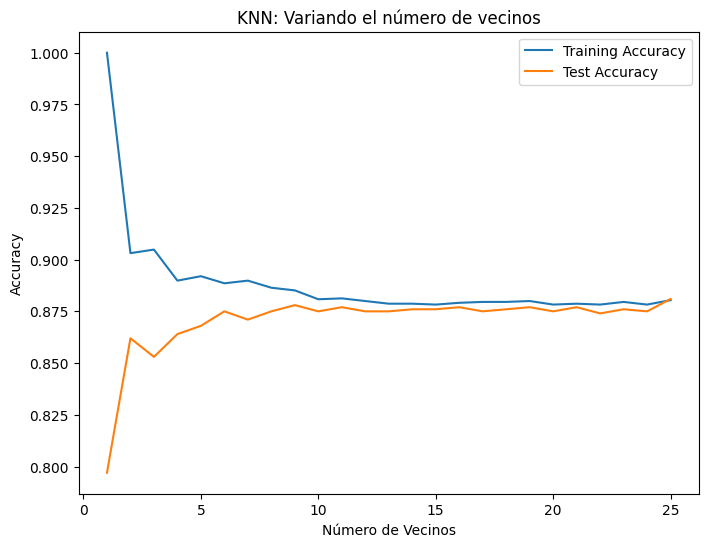

In [22]:
plt.figure(figsize=(8,6))
plt.title("KNN: Variando el número de vecinos")
plt.plot(neighbors,train_accuracies.values(),label="Training Accuracy")
plt.plot(neighbors,test_accuracies.values(),label="Test Accuracy")
plt.legend()
plt.xlabel("Número de Vecinos")
plt.ylabel("Accuracy")
plt.show()

## Introducción a la regresión

In [102]:
diabetes_df = pd.read_csv("./diabetes_clean.csv")
print(diabetes_df.head())

   pregnancies  glucose  diastolic  triceps  ...   bmi    dpf  age  diabetes
0            6      148         72       35  ...  33.6  0.627   50         1
1            1       85         66       29  ...  26.6  0.351   31         0
2            8      183         64        0  ...  23.3  0.672   32         1
3            1       89         66       23  ...  28.1  0.167   21         0
4            0      137         40       35  ...  43.1  2.288   33         1

[5 rows x 9 columns]


#### Creación de matrices de características y objetivos

In [9]:
X = diabetes_df.drop("glucose",axis=1).values
y = diabetes_df["glucose"].values

##### Predicciones a partir de una sola característica (el índice de masa corporal)

In [45]:
X_bmi = X[:,4]
print(X_bmi.shape,y.shape)

(768,) (768,)


Conversión de X a una matriz bidimencional para scikit-learn las acepte.

In [46]:
X_bmi = X_bmi.reshape(-1,1)

##### Representación gráfica de la glucosa frente al índice de masa corporal

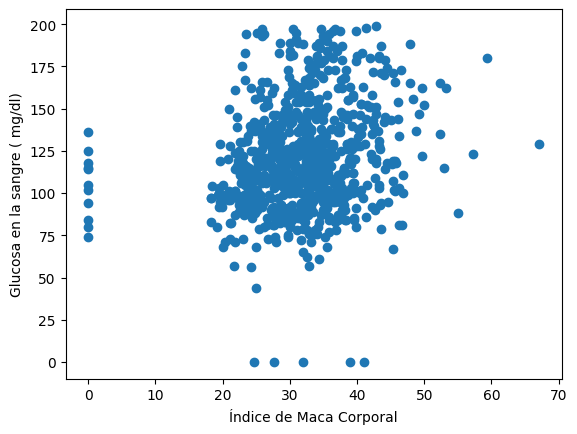

In [51]:
plt.scatter(X_bmi,y)
plt.xlabel("Índice de Maca Corporal")
plt.ylabel("Glucosa en la sangre ( mg/dl)")
plt.show()

##### Ajuste de un modelo de regresión

In [4]:
from sklearn.linear_model import LinearRegression

In [49]:
reg = LinearRegression()
reg.fit(X_bmi,y)
predicciones = reg.predict(X_bmi)


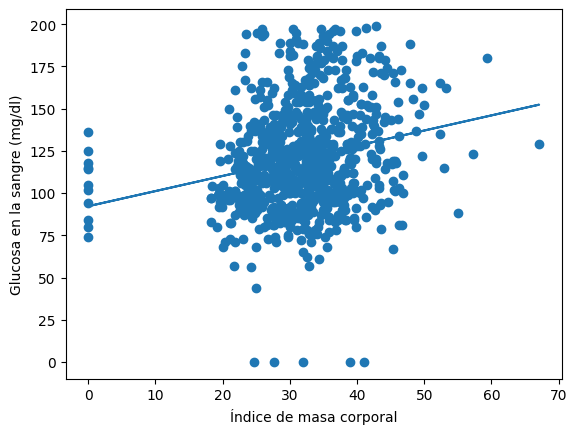

In [52]:
plt.scatter(X_bmi,y)
plt.plot(X_bmi,predicciones)
plt.xlabel("Índice de masa corporal")
plt.ylabel("Glucosa en la sangre (mg/dl)")
plt.show()

### Ejercicio (Sales)

In [26]:
sales_df = pd.read_csv("advertising_and_sales_clean.csv")

In [54]:
X = sales_df["radio"].values
y = sales_df["sales"].values
X = X.reshape(-1,1)
print(X.shape,y.shape)

(4546, 1) (4546,)


In [56]:
# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X,y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


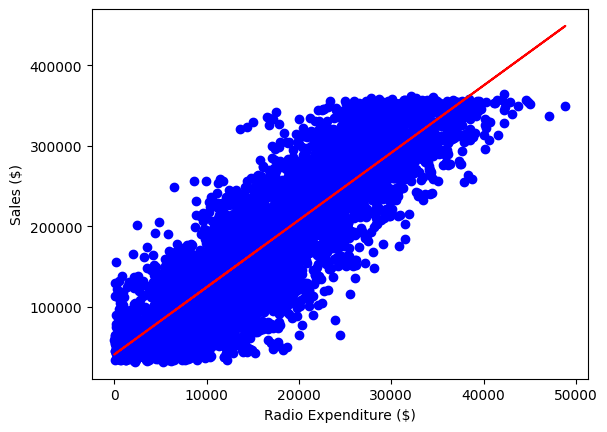

In [57]:
# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

## Regresión Lineal multivariante

In [60]:
X = diabetes_df.drop("glucose",axis=1).values
y = diabetes_df["glucose"].values
X.reshape(-1,1)

array([[ 6.   ],
       [72.   ],
       [35.   ],
       ...,
       [ 0.315],
       [23.   ],
       [ 0.   ]])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [65]:
reg_all = LinearRegression()
reg_all.fit(X_train,y_train)
y_pred = reg_all.predict(X_test)

La métrica por defecto de la regresión lineal es **R-cuadrado**
- $R^2$: cuantifica la varianza de los valores objetivo explicada por las características.

Los valores pueden ir de 0 a 1, donde 1 significa que las características explican completamente la varianza del objetivo.

$$R^2 = 1- \frac{\sum_{i=1}^n (Y_i-\hat{Y}_i)^2}{\sum_{i=1}^n (Y_i-\bar{Y})^2}$$

donde: 

$Y_i$ es el i-ésimo valor observado

$\hat{Y}_i$ es el i-ésimo valor predicho

$\bar{Y}$ es la media de los valores observados


##### R-cuadrado en scikit-learn

In [66]:
reg_all.score(X_test,y_test)

0.28280468810375115

Otra forma de evaluar el rendimiento de un modelo de regresión es tomar la media de la suma residual de cuadrados, conocido como **error cuadrático medio (MSE)**

$$MSE = \frac{1}{n}\sum_{i=0}^n (y_i-\hat{y}_i)^2$$

Tomando la raíz cuadrada el MSE tenemos las mismas unidades que la variable objetivo.

$$RMSE = \sqrt{MSE}$$

##### RMSE en scikit-learn

In [67]:
from sklearn.metrics import root_mean_squared_error

In [68]:
root_mean_squared_error(y_test,y_pred)

26.341459582232265

### Ejercicio

In [73]:
# Create X and y arrays
X = sales_df.drop(["sales","influencer"], axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train,y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


In [74]:
# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.433199600102


### Validación cruzada

In [19]:
from sklearn.model_selection import cross_val_score, KFold
# KFold nos permite crear una semilla y barajar nuestros datos

In [20]:
kf = KFold(n_splits=6,shuffle=True,random_state=42)
# n_splits: número de pliegues para la validación cruzada
# shuffle: True: para barajar los datos antes de dividirlo en pliegues.
# random_state: semilla para garantizar que los datos se dividirán de 
#la misma manera si se repite el proceso.

In [21]:
reg = LinearRegression()
cv_results = cross_val_score(reg,X,y,cv=kf)
# la puntuación obtenida es R^2, que es la que tiene por defecto la regresión lineal


In [22]:
print(cv_results)

[ 0.07572563  0.06636619  0.07239386  0.05051558 -0.04002086  0.03807372]


##### Ejercicio

In [43]:
len(X_sales)

4546

In [54]:
X_sales = sales_df.drop(["sales","influencer"], axis=1)
y_sales = sales_df["sales"].values
print(X_sales.shape)

(4546, 3)


In [56]:
# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X_sales, y, cv=kf)

# Print scores
print(cv_scores)

[0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]


In [58]:
# Print the mean
print(np.mean(cv_scores))

# Print the standard deviation
print(np.std(cv_scores))

# Print the 95% confidence interval
print(np.quantile(cv_scores, [0.025, 0.975]))

0.9989896443678249
6.608118371529651e-05
[0.99889767 0.99908583]


### Regresión regularizada

#### Regresión Ridge

supongamos que nuestra función de regesión es la siguiente:

$$a_1x_1+a_2x_2+...+a_nx_n+b$$

Con la regresión Ridge, a la función de pérdica MCO (Mínimos Cuadrados Ordinarios) se le agrega un término extra de penalización a la función de perdida para los coeficientes $a_i$, quedando la nueva función de pérdida como:

$$\text{función de perdida MCO} + \alpha * \sum_{i=1}^n a_i^2$$

In [64]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [77]:
sales_df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [94]:
X_ridge = sales_df[['tv','radio','social_media']]
y_ridge=sales_df['sales']

In [95]:
X_train,X_test,y_train,y_test = train_test_split(X_ridge,y_ridge,test_size=0.3,random_state=42)

In [96]:
scores = []
for alpha in [0.1,1.0,10.0,100.0,1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test,y_test))
print(scores)


[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387]


#### Regresión Lasso

supongamos que nuestra función de regesión es la siguiente:

$$a_1x_1+a_2x_2+...+a_nx_n+b$$

Con la regresión Lasso, a la función de pérdica MCO (Mínimos Cuadrados Ordinarios) se le agrega un término extra de penalización a la función de perdida para los coeficientes $a_i$, quedando la nueva función de pérdida como:

$$\text{función de perdida MCO} + \alpha * \sum_{i=1}^n |a_i|$$

- Ayuda a seleccionar características importantes de un conjunto de datos.
- Reduce a 0 los coeficientes de las características menos importantes.

In [100]:
from sklearn.linear_model import Lasso

In [101]:
scores = []
for alpha in [0.1,1.0,10.0,100.0,1000.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    y_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test,y_test))
print(scores)

[0.9990152104790647, 0.9990152105072273, 0.9990152107889495, 0.9990152136067459, 0.9990152417537391]


##### Lasso para la selección de características

In [103]:
X_dia  = diabetes_df.drop("glucose",axis=1).values
y_dia = diabetes_df['glucose'].values
names = diabetes_df.drop("glucose",axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X_dia,y_dia).coef_


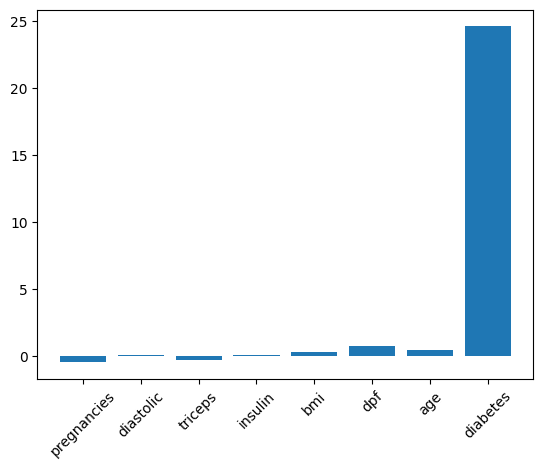

In [105]:
plt.bar(names,lasso_coef)
plt.xticks(rotation=45)
plt.show()

## Afina tu modelo

### Puntuación F1

$$F1=2*\frac{\text{precision*recall}}{\text{precision+recall}}$$

##### Matriz de confusión en scikit-learn

In [106]:
from sklearn.metrics import classification_report, confusion_matrix

In [109]:
X_c = churn_df[['total_day_charge','total_eve_charge']].values
y_c = churn_df['churn'].values

In [110]:
knn = KNeighborsClassifier(n_neighbors=7)
X_train, X_test, y_train,y_test = train_test_split(X_c,y_c,test_size=0.4,random_state=42)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [111]:
print(confusion_matrix(y_test,y_pred))

[[1111   27]
 [ 142   54]]


In [112]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1138
           1       0.67      0.28      0.39       196

    accuracy                           0.87      1334
   macro avg       0.78      0.63      0.66      1334
weighted avg       0.85      0.87      0.85      1334



### Regresión logística y curva ROC

- La regresión logistica se utiliza para problemas de clasificación
- Produce probabilidades
- Si la probabilidad, p>0.5, los datos se etiquetan con 1.
- Si la probabilidad, p<0.5, los datos se etiquetan con 0.

In [113]:
from sklearn.linear_model import LogisticRegression

In [115]:
logreg = LogisticRegression()
X_train, X_test,y_train, y_test = train_test_split(X_c,y_c,test_size=0.3,random_state=42)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

##### predecir probabilidades

In [ ]:
y_pred_probs = logreg.predict_proba(X_test)[:,1]


#### Curva ROC

Ayuda a ver cómo afectan los distintos umbrales a las tasas de verdaderos positivos y falsos positivos.

Cuando el umbral es igual a 0, el modelo predice 1 para todas las observaciones, lo que significa que predecirá correctamente todas los valores positvos y de forma incorrecta todos los valoes negativos.

Si el umbral es 0, el modelo predice 0 para toda slas observaciones.


In [117]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_test,y_pred_probs)

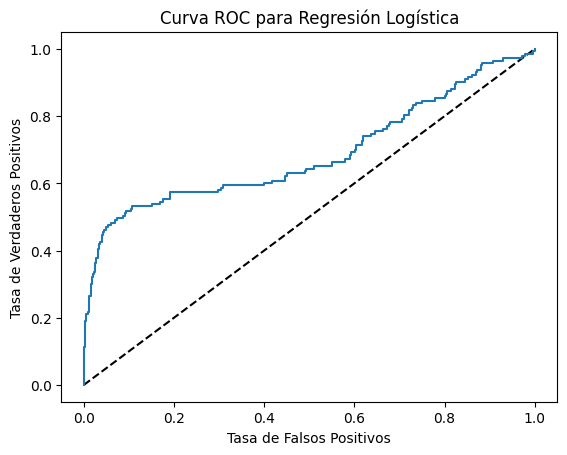

In [118]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Regresión Logística')
plt.show()

#### ROC AUC (área bajo la curva)

Cuántifica el rendimiento del modelo a partir de la curva ROC calculando el área bajo la curva.

In [119]:
from sklearn.metrics import roc_auc_score

In [120]:
print(roc_auc_score(y_test,y_pred_probs))

0.6870364174914934


### Optimización de hiperparámetros

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)
param_grid = {"alpha":np.arange(0.0001,1,10),"solver":["sag","lsqr"]}
ridge = Ridge()

In [123]:
ridge_cv = GridSearchCV(ridge,param_grid,cv=kf)
ridge_cv.fit(X_train,y_train)
print(ridge_cv.best_params_,ridge_cv.best_score_)


{'alpha': 0.0001, 'solver': 'lsqr'} 0.03525257192862676


In [124]:
from sklearn.model_selection import RandomizedSearchCV

In [125]:
ridge_cv_r = RandomizedSearchCV(ridge,param_grid,cv=kf,n_iter=2)
ridge_cv_r.fit(X_train,y_train)
print(ridge_cv.best_params_,ridge_cv.best_score_)

{'alpha': 0.0001, 'solver': 'lsqr'} 0.03525257192862676


In [127]:
test_score = ridge_cv_r.score(X_test,y_test)
print(test_score)

0.06900622381983401


## Procesamiento y canalizaciones

### Procesamiento de datos

#### Tratar con rasgos categóricos

One-hot: para convertir variables categoricas en variables binarias.

- scikit-learn **OneHotEncoder()**
- pandas: **get_dummies()**

In [130]:
music_df = pd.read_csv('./music_clean.csv')

In [135]:
music_dummies = pd.get_dummies(music_df["genre"],drop_first=True)

In [139]:
## Unir 2 dataframes
music_dummies = pd.concat([music_df,music_dummies],axis=1)
music_dummies  = music_dummies.drop("genre",axis=1)

In [142]:
music_dummies.shape

(1000, 25)

##### Ejercicio

In [145]:
# Create music_dummies
music_dummies = pd.get_dummies(music_df,drop_first=True)


#### Tratamiendo de los datos que faltan

In [148]:
music_df.isnull().sum()

Unnamed: 0          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64

Un enfoque común es eliminar las observaciones faltantes wue representen menos del 5% de todos los datos.

In [149]:
music_df_clean  = music_df.dropna(subset = ['genre','popularity','loudness','liveness','tempo'])

Para valores númericos, podemos optar por llenar los valores faltantes el valor promerio de los datos. También se puede usar la mediana. Para valores categóricos, solemos usar el valor más frecuente:moda.

Debemos tomar en cuenta que primero tenemos que dividir nuestro datos para evitar que se filtre información del conjunto de pruebas a nuestro modelo. A esto se le llama *la fuga de datos*.

##### Imputación con scikit-learn

In [150]:
from sklearn.impute import SimpleImputer


In [151]:
X_cat = music_df['genre'].values.reshape(-1,1)
X_num = music_df.drop(['genre','popularity'],axis=1).values
y = music_df['genre'].values

In [153]:
X_train_cat,X_test_cat,y_train_cat,y_test_cat = train_test_split(X_cat,y,test_size=0.2,random_state=42)
X_train_num,X_test_num,y_train_num,y_test_num = train_test_split(X_num,y,test_size=0.2,random_state=42)

In [154]:
imp_cat = SimpleImputer(strategy="most_frequent")
X_train_cat = imp_cat.fit_transform(X_train_cat)
X_test_cat = imp_cat.transform(X_test_cat)

In [155]:
# por defecto SimpleImputer rellena los datos con la media
imp_num = SimpleImputer()

X_train_num = imp_num.fit_transform(X_train_num)
X_test_num = imp_num.transform(X_test_num)

X_train = np.append(X_train_num,X_train_cat,axis=1)
X_test = np.append(X_test_num,X_test_cat,axis=1)

##### Imputación dentro de un pipeline

In [156]:
from sklearn.pipeline import Pipeline

In [157]:
music_df_clean  = music_df.dropna(subset = ['genre','popularity','loudness','liveness','tempo'])

In [158]:
music_df_clean['genre'] = np.where(music_df_clean['genre'] == "Rock",1,0)

In [159]:
X_m = music_df_clean.drop("genre",axis=1).values
y_m = music_df_clean["genre"].values

In [161]:
steps = [("imputation",SimpleImputer()),("logistic_regression",LogisticRegression())]
pipeline = Pipeline(steps)

X_train_m,X_test_m,y_train_m,y_test_m = train_test_split(X_m,y_m,test_size=0.3,random_state=42)

#pipeline.fit(X_train_m,y_train_m)
#pipeline.score(X_test_m,y_test_m)


#### Centrado y escalado

Debemos de escalar nuestros datos ya que las características con mayor escala pueden influir desproporcionalmente en el modelo.

Una forma de (normalizar) escalar nuestros datos es estarle la media y dividir por la varianza. Así, todas las características estarán centradas en 0 y tendrán varianza 1.

Otra forma es restarle el mínimo y dividirlo por el intervalo(rango).

##### Normalizado

$$X_{\text{new}} = \frac{X-\mu}{\sigma}$$

In [162]:
from sklearn.preprocessing import StandardScaler

In [163]:
X = music_df.drop("genre",axis=1).values
y = music_df['genre'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
print(np.mean(X),np.std(X))
print(np.mean(X_train_scaled),np.std(X_train_scaled))

20666.582585618085 68890.98734103922
6.361049253471373e-16 1.0000000000000002


##### Escalado en un pipeline

In [164]:
steps = [('scaler',StandardScaler()),
         ('knn',KNeighborsClassifier(n_neighbors=6))]
pipeline = Pipeline(steps)

knn_scaled = pipeline.fit(X_train,y_train)
y_pred = knn_scaled.predict(X_test)
print(knn_scaled.score(X_test,y_test))

0.9066666666666666


##### CV y escalado en un pipeline

In [165]:
from sklearn.model_selection import GridSearchCV


In [167]:
steps = [('scaler',StandardScaler()),
         ('knn',KNeighborsClassifier(n_neighbors=6))]
pipeline = Pipeline(steps)

parameters = {'knn__n_neighbors':np.arange(1,50)}

cv = GridSearchCV(pipeline,param_grid=parameters)
cv.fit(X_train,y_train)
cv.predict(X_test)
print(cv.best_score_)
print(cv.best_params_)

0.9242857142857144
{'knn__n_neighbors': 4}


#### Evaluar varios modelos

**algunos principios**:

- Tamaño del conjunto de datos: Menos características = modelo más simple, tiempo de entrenamiento más rápido.
- Algunos modelos requieren grandes cantidades de datos para funcionar bien.
- 

##### Evaluar modelos de clasificación


In [168]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

C:\Users\s4tor\AppData\Local\Temp\ipykernel_16468\3020516530.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results,labels = models.keys())


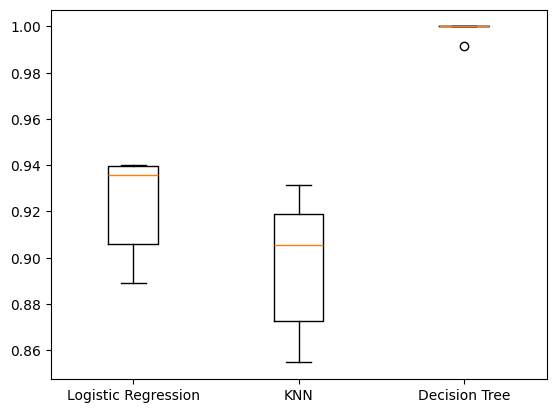

In [169]:
models = {"Logistic Regression":LogisticRegression(),"KNN":KNeighborsClassifier(),"Decision Tree": DecisionTreeClassifier()}

results = []

for model in models.values():
    kf = KFold(n_splits=6,random_state=42,shuffle=True)
    cv_results = cross_val_score(model,X_train_scaled,y_train,cv=kf)
    results.append(cv_results)

plt.boxplot(results,labels = models.keys())
plt.show()

##### Rendimiento del conjunto de pruebas 

In [170]:
for name, model in models.items():
    model.fit(X_train_scaled,y_train)
    test_score = model.score(X_test_scaled,y_test)
    print("{} Test Set Accuracy: {}".format(name,test_score))

Logistic Regression Test Set Accuracy: 0.8866666666666667
KNN Test Set Accuracy: 0.89
Decision Tree Test Set Accuracy: 1.0
